# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 4/25/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 4/25/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,1683,38928341,4.3
Albania,2144,2877800,74.5
Algeria,2406,43851043,5.5
Andorra,515,77265,666.5
Angola,2152,32866268,6.5
Antigua and Barbuda,29,97928,29.6
Argentina,328322,45195777,726.4
Armenia,10471,2963234,353.4
Australia,261,25459700,1.0


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Uruguay,40223,3473727,1157.9
Turkey,780958,84339067,926.0
Cyprus,10844,1207361,898.2
Bahrain,14908,1701583,876.1
Seychelles,854,98340,868.4
Sweden,80942,10099270,801.5
Croatia,30110,4105268,733.4
Argentina,328322,45195777,726.4
France,439536,65273512,673.4


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

4/21/21    3222888.0
4/22/21    3254609.0
4/23/21    3276871.0
4/24/21    3291293.0
4/25/21    3306692.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

4/12/21        NaN
4/13/21    29421.0
4/14/21    31117.0
4/15/21    25110.0
4/16/21    23856.0
4/17/21    20197.0
4/18/21     1217.0
4/19/21    11615.0
4/20/21    31397.0
4/21/21    24354.0
4/22/21    31721.0
4/23/21    22262.0
4/24/21    14422.0
4/25/21    15399.0
Name: Germany, dtype: float64

<AxesSubplot:>

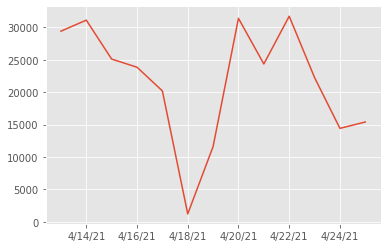

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

336.6850295721931